In [74]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)
neo.placenta(False)

# desiable the device models
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

models["Ans"].min_baro = 20.0
models["Ans"].set_baro = 57.0
models["Ans"].max_baro = 90.0
models["Ans"].g_map_hp = -1.48 # -1.48
models["Ans"].tc_map_hp = 2.0
models["Ans"].heart_rate_ref = 150.0 # 145

# stabilize by calculating 60 seconds
neo.calculate(120)
result = neo.analyze(["LA.vol", "LA.pres", "LV.vol","LV.pres", "Mob.sv_lv", "AA.pres", "LV_AA.flow", "Heart.heart_rate"], sampleinterval=0.0005, time_to_calculate=30)

# TARGETS 2.51 - 0.78 - 1.73  (LV EDV - LV ESV - SV)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 4.8 sec. Average model step in 0.0202 ms.

LA.vol          : max    1.95785, min    0.21839 ml/kg
LA.pres         : max   11.62111, min    0.99304 mmHg
LV.vol          : max    2.83719, min    0.80743 ml/kg
LV.pres         : max   78.25067, min   -0.63573 mmHg
Mob.sv_lv       : max    2.00717 min    1.70996
AA.pres         : max    77.8012, min   52.51601 mmHg
LV_AA.flow      : net  249.73263, forward  249.73263, backward        0.0 ml/kg/min, stroke volume:    1.83624 ml/kg, 
Heart.heart_rate: max  138.93824 min  136.53691


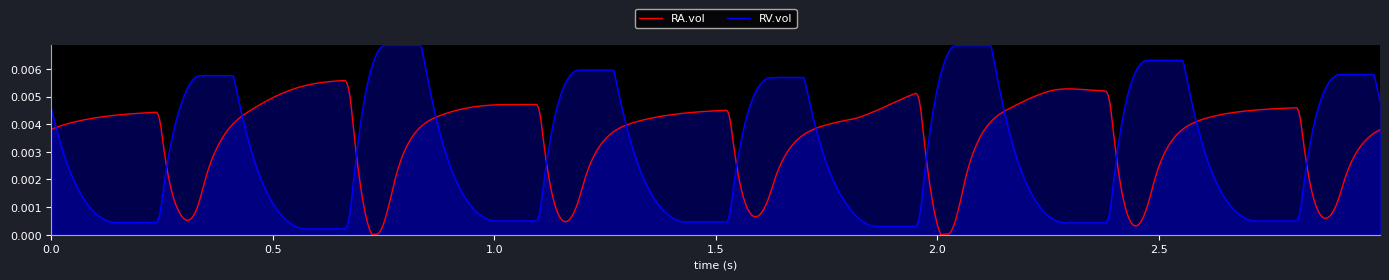


RA.vol          : max    1.69176, min    0.00336 ml/kg
RV.vol          : max     2.0785, min    0.06367 ml/kg


In [53]:
neo.plot_heart_volumes_right(analyze=True, time_to_calculate=3)

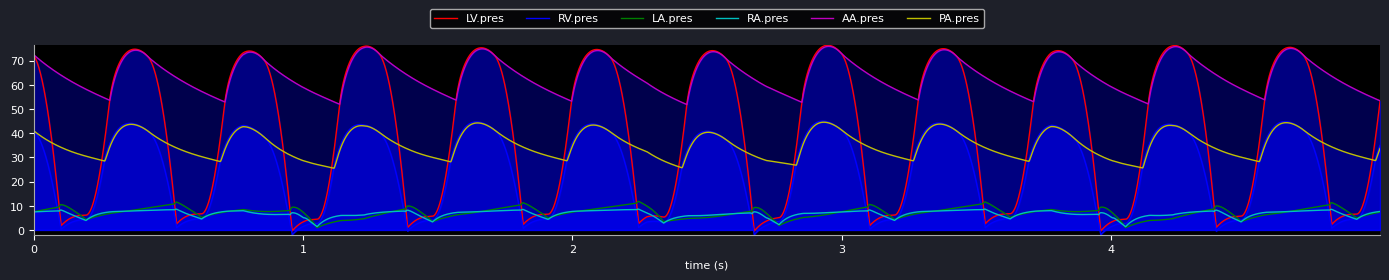


LV.pres         : max   76.31044, min   -0.46358 mmHg
RV.pres         : max   44.96047, min   -1.99353 mmHg
LA.pres         : max   11.78007, min    0.94402 mmHg
RA.pres         : max    8.60598, min     1.2992 mmHg
AA.pres         : max   75.86753, min   51.79988 mmHg
PA.pres         : max    44.5142, min   25.48638 mmHg


In [52]:
neo.plot_heart_pressures(analyze=True, time_to_calculate=5)

In [75]:
neo.get_vitals()


AA.pres         : max   77.95021, min   52.85954 mmHg
PA.pres         : max   45.54858, min   25.89608 mmHg
IVCI.pres       : max    8.28115, min    7.16375 mmHg


{'heartrate': 137.12593695711672,
 'spo2_pre': 97.85614484170657,
 'spo2_post': 97.56148820631333,
 'abp_systole': 77.95021,
 'abp_diastole': 52.85954,
 'pap_systole': 45.54858,
 'pap_diastole': 25.89608,
 'cvp': 7.53617942,
 'resp_rate': 38.09292787925492,
 'pH': 7.397510473409937,
 'po2': 98.81048693528682,
 'pco2': 42.682169655137535,
 'hco3': 25.969927503327998,
 'be': 0.6568399012111039}

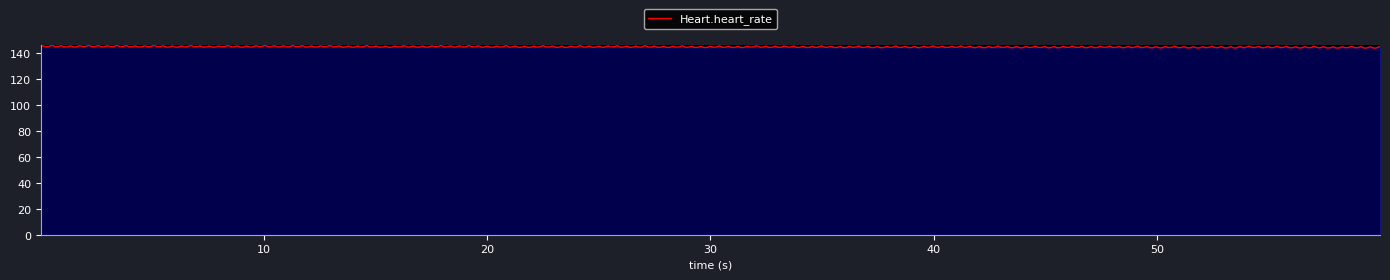


Heart.heart_rate: max  145.94506 min  143.76111


In [69]:
neo.plot_time_graph(["Heart.heart_rate"],time_to_calculate=60)

In [68]:
neo.fastforward(120)

 Ready in 5.1 sec. Average model step in 0.0211 ms.
